In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATASET_PATH = "/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml"
DATASET_PATH

'/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml'

In [3]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Entraîner YOLOv11n - 20 epoch

In [5]:
import time

start_time = time.time()

model = YOLO("yolo11n.pt")  # ou "yolo11s.pt" si GPU plus puissant

results = model.train(
    data=DATASET_PATH,
    epochs=20,
    imgsz=640,
    batch=16,
    name="bird_v11_train"
)

end_time = time.time()

print(f"\n⏱️ Temps total d'entraînement : { (end_time - start_time)/60:.2f} minutes")

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bird_v11_train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

YOLOv11n — 20 epochs

- Précision (P) : 0.733

Sur 100 prédictions positives, ~73 sont correctes.

- Recall (R) : 0.706

Le modèle détecte ~70% de tous les oiseaux présents.

- mAP50 : 0.743

Score très solide pour YOLO11n, surtout en only-20 epochs.

- mAP50-95 : 0.399

Excellent pour un modèle aussi petit.


## Sauvegarder automatiquement le modèle

In [7]:
import shutil

SOURCE = "/content/runs/detect/bird_v11_train2/weights/best.pt"
DEST = "/content/drive/MyDrive/bird_v11n_best_ep20.pt"

shutil.copy(SOURCE, DEST)

print("✔️ Modèle sauvegardé dans le Drive :", DEST)

✔️ Modèle sauvegardé dans le Drive : /content/drive/MyDrive/bird_v11n_best_ep20.pt


## Tester une image

In [9]:
!ls /content/drive/MyDrive

'Albane COIFFE_Documents.pdf'
'Analyse des données DVF.gslides'
'Attestation_sécurité_sociale_Albane Coiffe.pdf'
 Bird_Only.v1i.yolov11
 bird_v11n_best_ep20.pt
'Colab Notebooks'
 Data-20251126
'data management and ethics.gdoc'
 DSC_0361.JPG
 hawk-data.gdoc
 IMG_0004.JPG
 IMG_5435.MOV
"Les crets d'eau.docx"
"Les crets d'eau.pages"
 model2.pt
 OneDrive_2023-12-04.zip
"pièce d'identité - Albane COIFFE.pdf"
 PKLot_cleaned
 PSX_20210417_235931.jpg
'Rapport de progression.gslides'
"Rapport d'etonnement.pages"
'Rapport stage.gdoc'
'rapport v2.gdoc'


In [10]:
!ls /content/runs/detect/bird_v11_train2/weights/

best.pt  last.pt


In [27]:
modelv11n_best_ep20 = YOLO("/content/drive/MyDrive/bird_v11n_best_ep20.pt")


image 1/1 /content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg: 640x640 16 Birds, 11.1ms
Speed: 2.4ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Confidence: 0.425, BBox: [213.56948852539062, 286.23345947265625, 233.31607055664062, 326.9539794921875]
Confidence: 0.397, BBox: [118.66075134277344, 238.9632568359375, 138.94554138183594, 280.8330078125]
Confidence: 0.383, BBox: [314.8998107910156, 375.225341796875, 335.5852355957031, 414.3546142578125]
Confidence: 0.375, BBox: [263.35113525390625, 298.8396911621094, 282.73785400390625, 338.9563903808594]
Confidence: 0.367, BBox: [285.96942138671875, 394.7930908203125, 305.04376220703125, 424.2647705078125]
Confidence: 0.359, BBox: [302.8834228515625, 323.0958251953125, 325.274169921875, 364.90997314453125]
Confidence: 0.348, BBox: [379.305908203125, 348.1947326660156, 401.30224609375, 382.6454772949219]
Confidence: 0.342, BBox: [178.49325561523438, 2

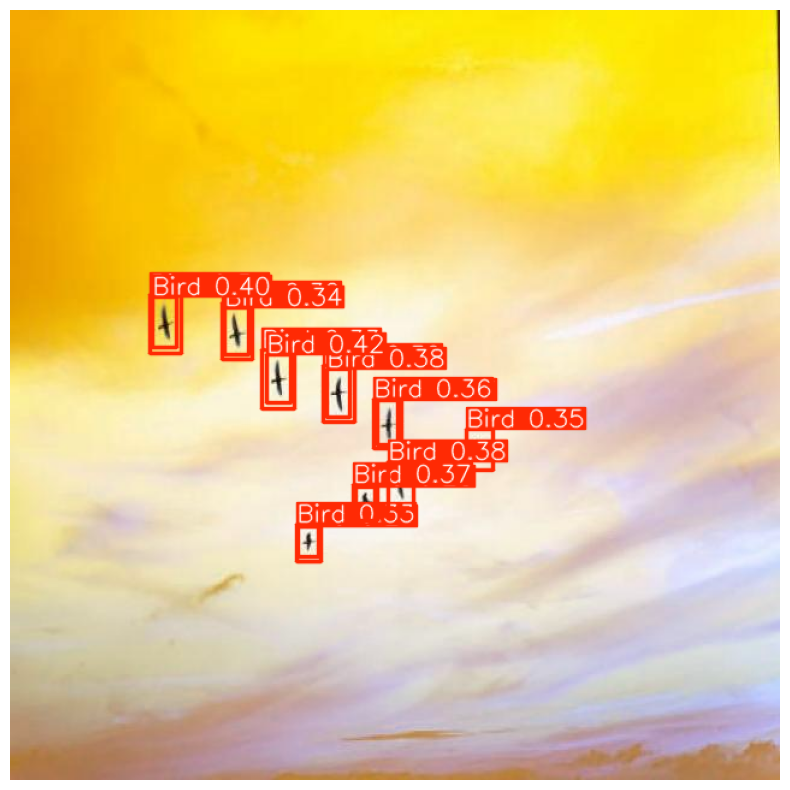

In [32]:
results = modelv11n_best_ep20.predict(
    source="/content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg"
)

annotated = results[0].plot()

plt.figure(figsize=(10,10))
plt.imshow(annotated)
plt.axis("off")

for box in results[0].boxes:
    conf = float(box.conf)
    xyxy = box.xyxy[0].tolist()
    print(f"Confidence: {conf:.3f}, BBox: {xyxy}")

=> Presque chaque box est compté 2 fois

## YOLO11n - 70 epoch

In [21]:
model.train(
    data=DATASET_PATH,
    epochs=70,
    imgsz=640,
    batch=16,
    name="bird_v11_train70"
)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/bird_v11n_best_ep20.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bird_v11_train70, nbs=64, nms=False, opset=None, optimize=False, optimizer=au

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5b7bd65c40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

| Metric        | 20 epochs | 70 epochs | Gain    |
| ------------- | --------- | --------- | ------- |
| **Precision** | 0.733     | **0.774** | +4.1% |
| **Recall**    | 0.706     | **0.747** | +4.1% |
| **mAP50**     | 0.743     | **0.786** | +4.3% |
| **mAP50-95**  | 0.399     | **0.437** | +3.8% |


In [22]:
import shutil

SOURCE = "/content/runs/detect/bird_v11_train70/weights/best.pt"
DEST = "/content/drive/MyDrive/bird_v11n_best_ep70.pt"

shutil.copy(SOURCE, DEST)

print("Nouveau modèle 70 epochs sauvegardé dans :", DEST)

Nouveau modèle 70 epochs sauvegardé dans : /content/drive/MyDrive/bird_v11n_best_ep70.pt


In [29]:
modelv11n_best_ep70 = YOLO("/content/drive/MyDrive/bird_v11n_best_ep70.pt")


image 1/1 /content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg: 640x640 10 Birds, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Confidence: 0.605, BBox: [214.4568634033203, 288.49664306640625, 232.9383087158203, 324.19451904296875]
Confidence: 0.596, BBox: [263.515625, 301.2753601074219, 283.2344970703125, 336.7653503417969]
Confidence: 0.558, BBox: [304.1444091796875, 325.94171142578125, 324.10174560546875, 361.34173583984375]
Confidence: 0.558, BBox: [315.37188720703125, 378.2908020019531, 334.2431640625, 409.7702941894531]
Confidence: 0.548, BBox: [178.47119140625, 248.73548889160156, 198.64337158203125, 284.8087158203125]
Confidence: 0.525, BBox: [119.08993530273438, 240.7581024169922, 139.59918212890625, 278.89117431640625]
Confidence: 0.499, BBox: [286.3331298828125, 396.944580078125, 304.1910400390625, 419.912109375]
Confidence: 0.423, BBox: [380.7247314453125, 353.694885

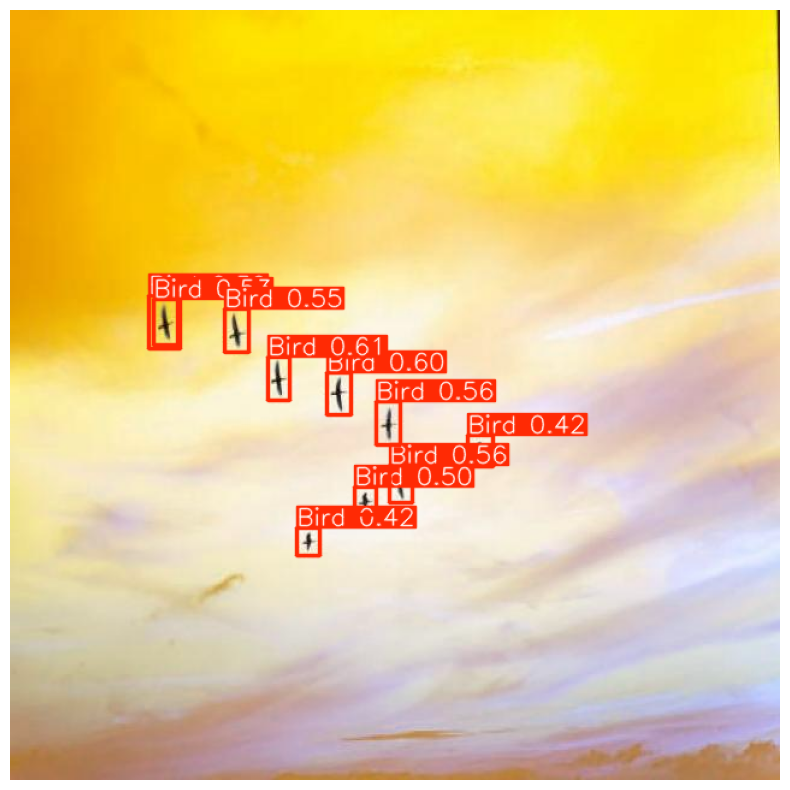

In [33]:
results = modelv11n_best_ep70.predict(
    source="/content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg"
)

annotated = results[0].plot()

plt.figure(figsize=(10,10))
plt.imshow(annotated)
plt.axis("off")

for box in results[0].boxes:
    conf = float(box.conf)
    xyxy = box.xyxy[0].tolist()
    print(f"Confidence: {conf:.3f}, BBox: {xyxy}")

=> une seule box est compté 2 fois

## Comparaison 20 VS 70 epoch

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

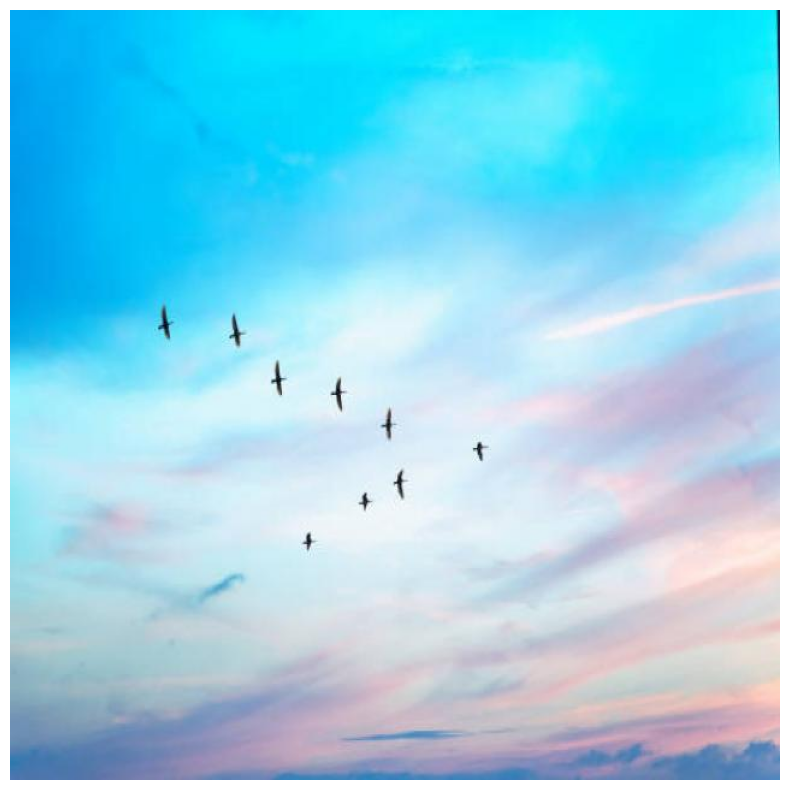

In [31]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")


9 oiseaux

| Critère                      | 20 epochs                              | 70 epochs                      |
| ---------------------------- | -------------------------------------- | ------------------------------ |
| Nombre de boxes détectées | **15 boxes**                           | **10 boxes**                   |
| Avec score > 0.40         | **4**                                  | **8**                          |
| Avec score > 0.50         | **0**                                  | **6**                          |
| -------------- | --------- | --------- |
| Score moyen    | **0.350** | **0.519** |
| Meilleur score | **0.425** | **0.605** |
| Pire score     | **0.272** | **0.296** |



## YOLO11s

## YOLO11n